In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt


In [2]:
#data
N = 1000
series = np.sin(0.1*np.arange(N)) + 0.1*np.random.rand(N)

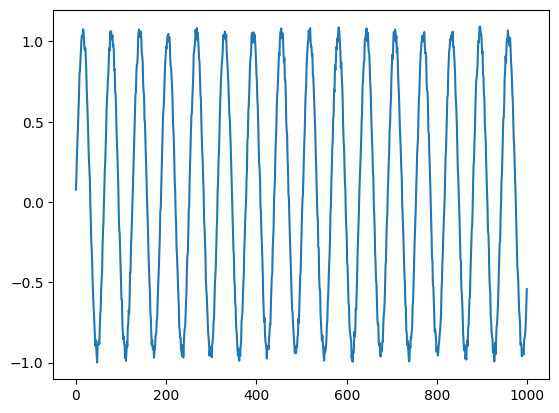

In [3]:
plt.plot(series)
plt.show()

In [4]:
type(series),len(series)

(numpy.ndarray, 1000)

In [5]:
#building data

T = 10
X = []
Y = []
for i in range(len(series) - T):

  x = series[i:i+T]
  y = series[i+T]

  X.append(x)
  Y.append(y)

X = np.array(X).reshape(-1,T)
Y = np.array(Y).reshape(-1,1)


print(len(X))
print(X.shape,Y.shape)





990
(990, 10) (990, 1)


In [6]:
type(X)

numpy.ndarray

In [7]:
#Split the data into train and test

N = len(X)

X_train = torch.from_numpy(X[:-N//2].astype("float32"))
Y_train = torch.from_numpy(Y[:-N//2].astype("float32"))
X_test = torch.from_numpy(X[-N//2:].astype("float32"))
Y_test = torch.from_numpy(Y[-N//2:].astype("float32"))

In [8]:
X_train.shape

torch.Size([495, 10])

In [9]:
model = nn.Linear(10,1)

In [10]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.1)


In [11]:
#Training

epochs = 200
train_loss = np.zeros(epochs)

for i in range(epochs):

  optimizer.zero_grad()

  outputs = model(X_train)

  loss = criterion(outputs,Y_train)

  loss.backward()

  optimizer.step()

  train_loss[i] = loss.item()

  print(f"epoch - {i+1}/{epochs} -- training loss -- {loss.item()}")



epoch - 1/200 -- training loss -- 0.49912893772125244
epoch - 2/200 -- training loss -- 0.2823306918144226
epoch - 3/200 -- training loss -- 0.35040679574012756
epoch - 4/200 -- training loss -- 0.2254139930009842
epoch - 5/200 -- training loss -- 0.1016482263803482
epoch - 6/200 -- training loss -- 0.08435069024562836
epoch - 7/200 -- training loss -- 0.10682377964258194
epoch - 8/200 -- training loss -- 0.08347053825855255
epoch - 9/200 -- training loss -- 0.029395099729299545
epoch - 10/200 -- training loss -- 0.0022514755837619305
epoch - 11/200 -- training loss -- 0.020310332998633385
epoch - 12/200 -- training loss -- 0.04693964123725891
epoch - 13/200 -- training loss -- 0.04676784202456474
epoch - 14/200 -- training loss -- 0.02835971489548683
epoch - 15/200 -- training loss -- 0.02121930569410324
epoch - 16/200 -- training loss -- 0.035274308174848557
epoch - 17/200 -- training loss -- 0.05168742313981056
epoch - 18/200 -- training loss -- 0.05083928257226944
epoch - 19/200 --

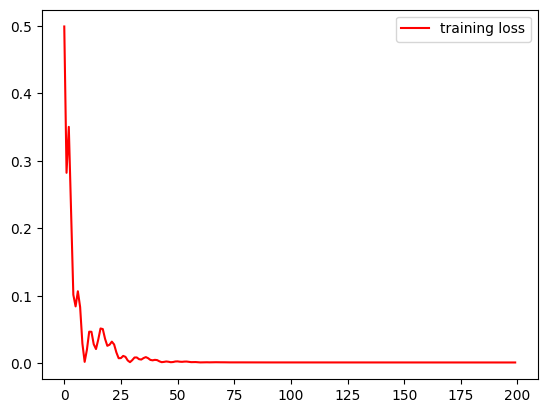

In [12]:
plt.plot(train_loss,label = "training loss",c= "red")
plt.legend()
plt.show()

In [13]:
N

990

In [14]:
#Wrong Forecasting

validation_targets = Y[-N//2:]

validation_predictions = []

i = 0

while len(validation_predictions) < len(validation_targets):


  input = X_test[i].view(1,-1)

  p = model(input)[0,0].item()

  validation_predictions.append(p)

  i+=1






In [15]:
X_test[0].view(-1,1).shape

torch.Size([10, 1])

In [16]:
len(validation_predictions)

495

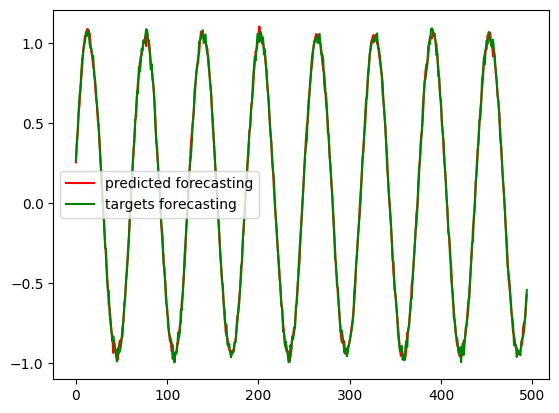

In [17]:
plt.plot(validation_predictions,label = "predicted forecasting", c = "red")
plt.plot(validation_targets, label = "targets forecasting", c= "green")
plt.legend()
plt.show()

In [18]:
#Correct process

validation_targets = Y[-N//2:]

validation_predictions = []

last_x = torch.from_numpy(X[-N//2].astype("float32"))

while len(validation_predictions) < len(validation_targets):

  input = last_x.view(1,-1)

  p = model(input)

  validation_predictions.append(p[0,0].item())

  last_x = torch.cat((last_x[1:], p[0]))



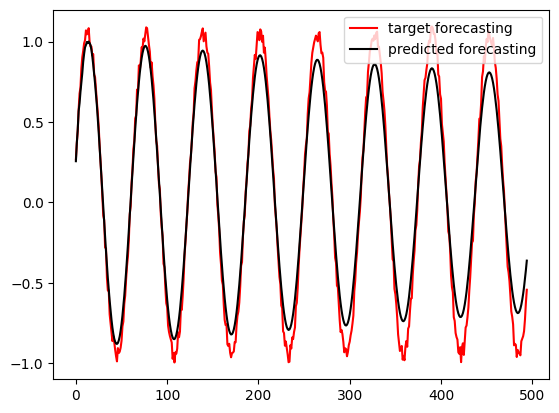

In [19]:
plt.plot(validation_targets,label = "target forecasting", c= "red")
plt.plot(validation_predictions,label = "predicted forecasting", c ="black")
plt.legend()
plt.show()

In [20]:
np.random.rand(10)

array([0.09014399, 0.58796758, 0.18559861, 0.93779908, 0.85285865,
       0.76697217, 0.16532209, 0.13011616, 0.83631124, 0.4340445 ])